In [1]:
# SIDE PROJECT : STROKE PREDICTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
stroke1 = pd.read_csv("stroke.csv")
stroke1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke1.value_counts("id")

id
67       1
49095    1
49229    1
49196    1
49190    1
        ..
24289    1
24272    1
24262    1
24257    1
72940    1
Length: 5110, dtype: int64

In [5]:
stroke1.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
stroke1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
stroke1.shape

(5110, 12)

In [8]:
cols = [col_name.lower() for col_name in stroke1.columns]
stroke1.columns = cols
cols

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [9]:
stroke1.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
stroke1.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
stroke1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
# just want stroke in adult
stroke18 = stroke1[stroke1["age"] > 18]
stroke18.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
# deleting id column - no meaning
stroke18 = stroke18.drop('id', axis=1)
stroke18.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
stroke18["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [15]:
stroke18["age"].unique()

array([67., 61., 80., 49., 79., 81., 74., 69., 59., 78., 54., 50., 64.,
       75., 60., 57., 71., 52., 82., 65., 58., 42., 48., 72., 63., 76.,
       39., 77., 73., 56., 45., 70., 66., 51., 43., 68., 47., 53., 38.,
       55., 46., 32., 37., 40., 35., 20., 44., 25., 27., 23., 22., 30.,
       29., 21., 33., 24., 34., 36., 41., 26., 31., 62., 28., 19.])

In [16]:
# dropping NaN values - 201
stroke18 = stroke18.dropna()
stroke18

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
# i want the age to be an integer
stroke18['age'] = stroke18['age'].apply(lambda x: round(x))
stroke18.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [18]:
stroke18["hypertension"].unique()

array([0, 1])

In [19]:
stroke18["heart_disease"].unique()

array([1, 0])

In [20]:
stroke18["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
stroke18["residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [22]:
# round avg glucose level to 0 decimals - when you measure glucose levels normally comes with 0 decimals
stroke18['avg_glucose_level'] = stroke18['avg_glucose_level'].apply(lambda x: round(x))
stroke18.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,229,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,106,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186,29.0,formerly smoked,1


In [23]:
# i will not round BMI because its normal to have decimals
stroke18["bmi"].nunique()

380

In [24]:
stroke18["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [25]:
stroke18["stroke"].unique()

array([1, 0])

In [26]:
# stroke is our target!
stroke18["stroke"].value_counts()

0    3806
1     208
Name: stroke, dtype: int64

In [27]:
num_18 = stroke18.select_dtypes(include=['int64', "float64"])
num_18.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67,0,1,229,36.6,1
2,80,0,1,106,32.5,1
3,49,0,0,171,34.4,1
4,79,1,0,174,24.0,1
5,81,0,0,186,29.0,1


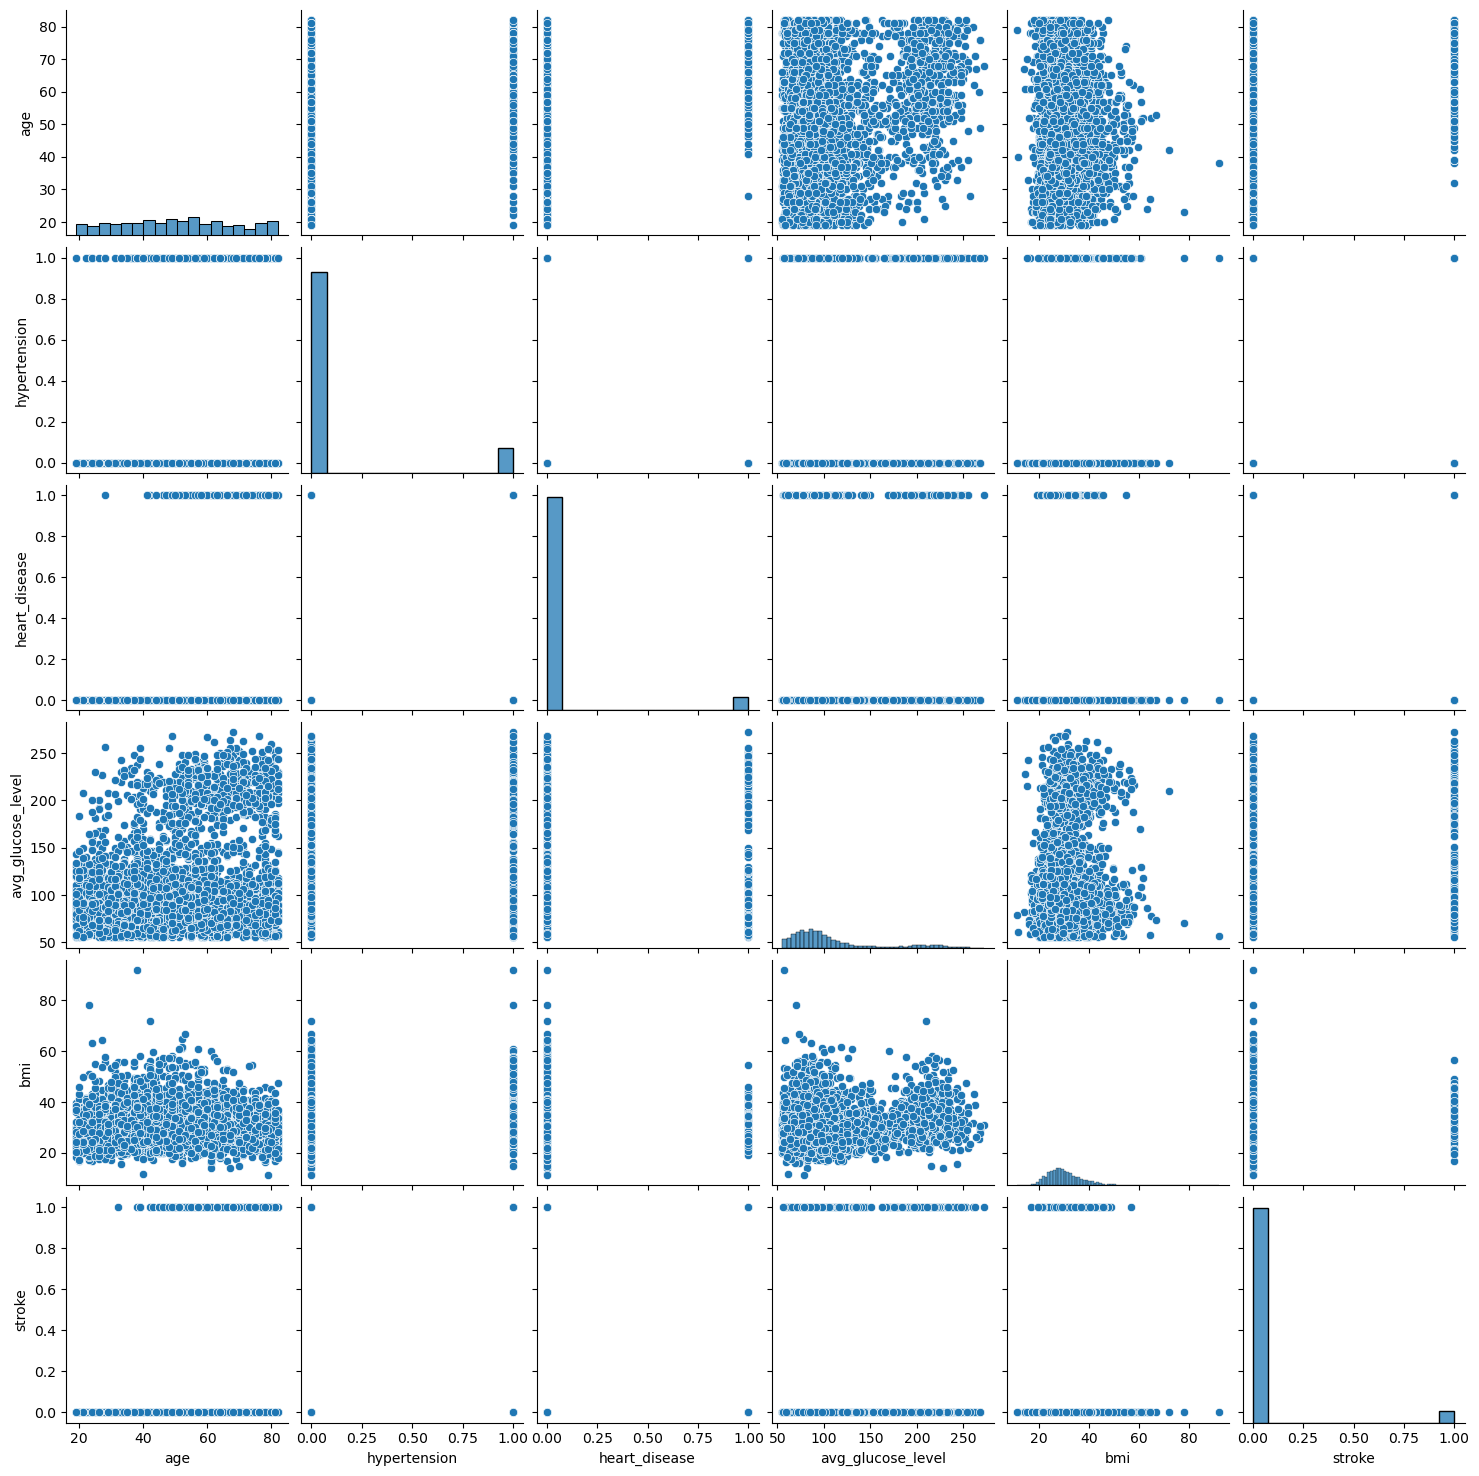

In [28]:
sns.pairplot(num_18)

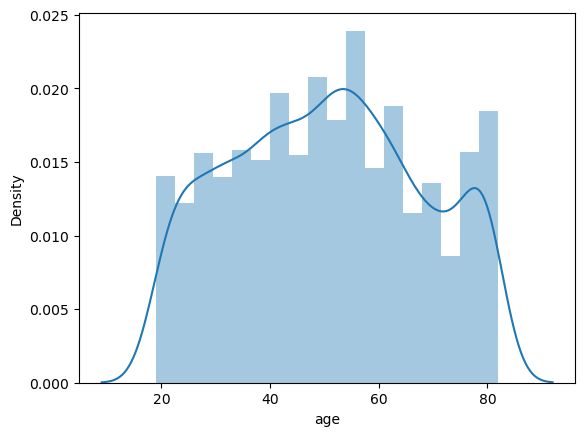

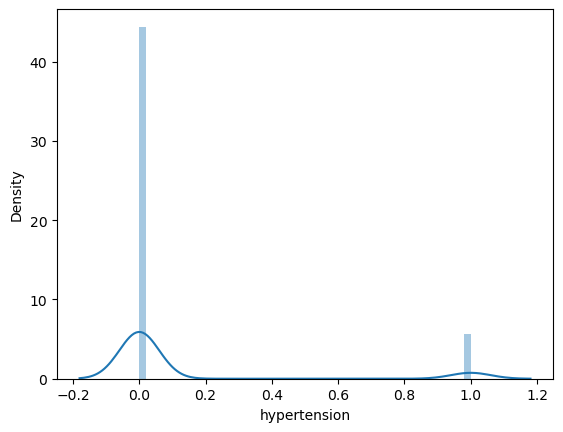

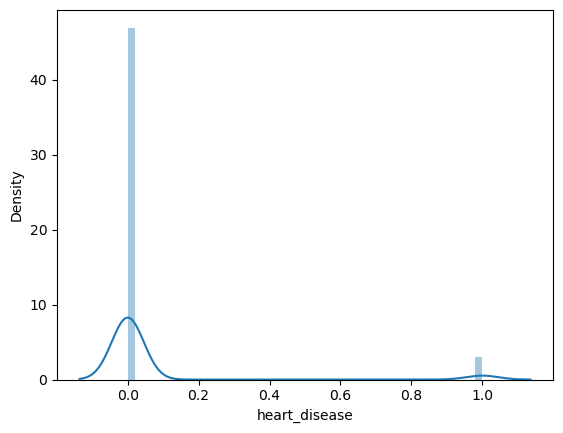

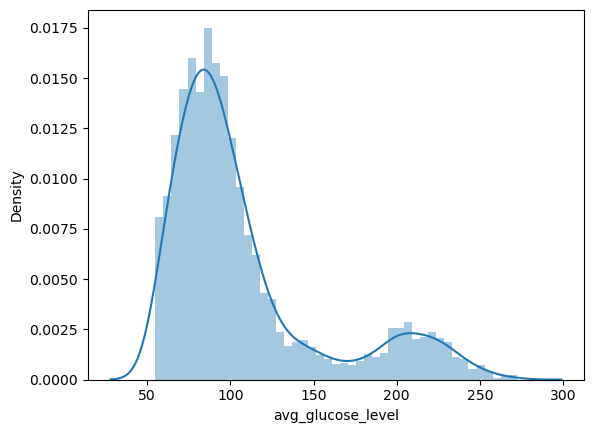

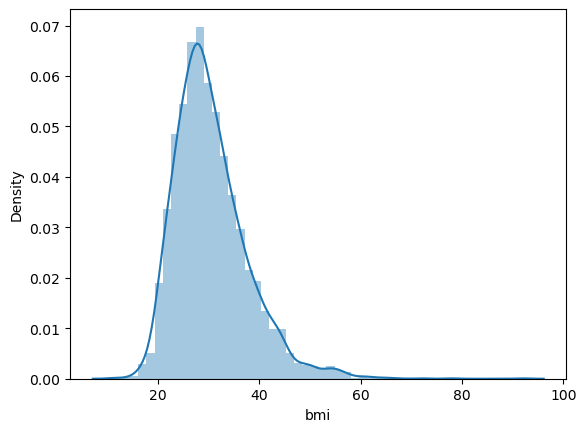

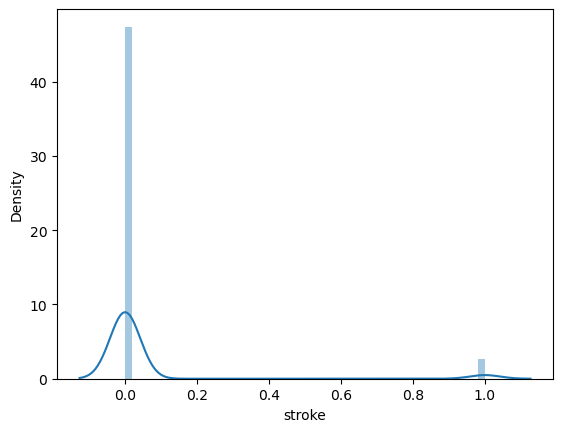

In [29]:
for column in num_18.columns:
    sns.distplot(num_18[column])
    plt.show()

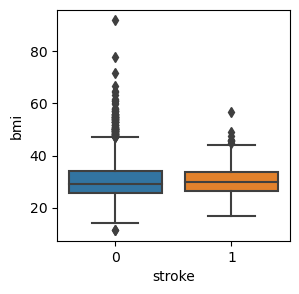

In [30]:
plt.figure(figsize=(3,3))

sns.boxplot(x="stroke", y= num_18["bmi"], data = num_18)
plt.show()

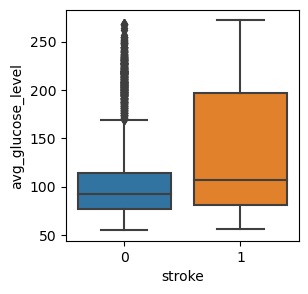

In [31]:
plt.figure(figsize=(3,3))

sns.boxplot(x="stroke", y= num_18["avg_glucose_level"], data = num_18)
plt.show()

# with higher glucose , more people with stroke

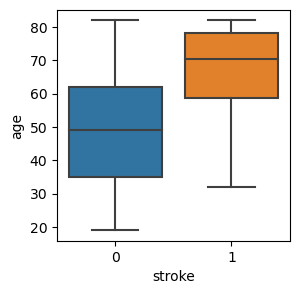

In [32]:
plt.figure(figsize=(3,3))

sns.boxplot(x="stroke", y= num_18["age"], data = num_18)
plt.show()
# stroke population is in the older range

In [33]:
stroke18.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,229,36.6,formerly smoked,1


In [34]:
num_18_corr = num_18.corr()
num_18_corr = round(num_18_corr,2)
num_18_corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.24,0.26,0.23,0.02,0.24
hypertension,0.24,1.00,0.10,0.17,0.12,0.13
heart_disease,0.26,0.10,1.00,0.15,-0.01,0.13
avg_glucose_level,0.23,0.17,0.15,1.00,0.16,0.13
bmi,0.02,0.12,-0.01,0.16,1.00,-0.00
stroke,0.24,0.13,0.13,0.13,-0.00,1.00


<Figure size 1000x1000 with 0 Axes>

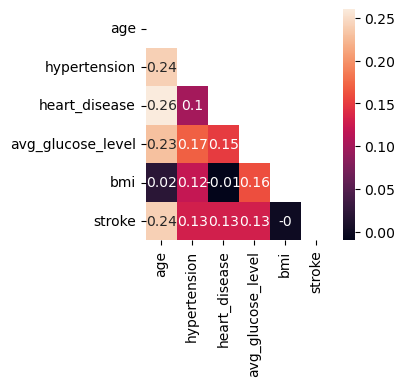

In [35]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(num_18_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(num_18_corr, mask=mask, annot=True)
plt.show()
#not that much multicollinearity so, won't drop any

In [36]:
cat18 = stroke18.select_dtypes(include=["object"])
cat18.head()

,gender,ever_married,work_type,residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked


In [37]:
# encoding categorical usig get dummies
cat18 = pd.get_dummies(cat18, drop_first = True)
cat18

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,0,1,0,1,1,0,0
2,1,0,1,0,1,0,0,0,1,0
3,0,0,1,0,1,0,1,0,0,1
4,0,0,1,0,0,1,0,0,1,0
5,1,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5102,0,0,1,0,1,0,0,0,1,0
5106,0,0,1,0,0,1,1,0,1,0
5107,0,0,1,0,0,1,0,0,1,0
5108,1,0,1,0,1,0,0,1,0,0


In [38]:
# x-y split - stroke is the TARGET

y = num_18['stroke']
X = num_18.drop(['stroke'], axis=1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67,0,1,229,36.6
2,80,0,1,106,32.5
3,49,0,0,171,34.4
4,79,1,0,174,24.0
5,81,0,0,186,29.0


In [39]:
transformer = MinMaxScaler().fit(X) 
x_minmax = transformer.transform(X) 
print(x_minmax.shape)

(4014, 5)


In [45]:
X_num_18_norm = pd.DataFrame(x_minmax,columns=X.columns)
X_num_18_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4014 non-null   float64
 1   hypertension       4014 non-null   float64
 2   heart_disease      4014 non-null   float64
 3   avg_glucose_level  4014 non-null   float64
 4   bmi                4014 non-null   float64
dtypes: float64(5)
memory usage: 156.9 KB


In [46]:
cat18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4014 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender_Male                     4014 non-null   uint8
 1   gender_Other                    4014 non-null   uint8
 2   ever_married_Yes                4014 non-null   uint8
 3   work_type_Never_worked          4014 non-null   uint8
 4   work_type_Private               4014 non-null   uint8
 5   work_type_Self-employed         4014 non-null   uint8
 6   residence_type_Urban            4014 non-null   uint8
 7   smoking_status_formerly smoked  4014 non-null   uint8
 8   smoking_status_never smoked     4014 non-null   uint8
 9   smoking_status_smokes           4014 non-null   uint8
dtypes: uint8(10)
memory usage: 199.6 KB


In [48]:
stroke_conc = pd.concat([X_num_18_norm, cat18], axis = 1)
stroke_conc.sample(50)
# Why do i get NaNs here?

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5071,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2291,0.396825,0.0,0.0,0.193548,0.182156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2759,0.079365,0.0,0.0,0.198157,0.289963,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2599,0.126984,0.0,0.0,0.331797,0.149938,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3418,0.380952,0.0,0.0,0.110599,0.247831,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3857,0.571429,0.0,0.0,0.009217,0.218092,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2556,0.111111,0.0,0.0,0.138249,0.164808,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1152,0.349206,0.0,0.0,0.119816,0.121437,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2884,0.380952,0.0,0.0,0.138249,0.156134,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
5085,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [49]:
stroke_conc.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000
mean,0.497936,0.112108,0.060289,0.242926,0.237843,0.387892,0.000249,0.797957,0.000498,0.655456,0.189337,0.509716,0.202043,0.420777,0.180369
std,0.277656,0.315538,0.238051,0.217428,0.089496,0.487331,0.015784,0.401574,0.022319,0.475279,0.391825,0.499968,0.401574,0.493745,0.384542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269841,0.000000,0.000000,0.101382,0.175960,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507937,0.000000,0.000000,0.170507,0.223048,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.714286,0.000000,0.000000,0.279954,0.283767,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
stroke_conc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4860 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4014 non-null   float64
 1   hypertension                    4014 non-null   float64
 2   heart_disease                   4014 non-null   float64
 3   avg_glucose_level               4014 non-null   float64
 4   bmi                             4014 non-null   float64
 5   gender_Male                     4014 non-null   float64
 6   gender_Other                    4014 non-null   float64
 7   ever_married_Yes                4014 non-null   float64
 8   work_type_Never_worked          4014 non-null   float64
 9   work_type_Private               4014 non-null   float64
 10  work_type_Self-employed         4014 non-null   float64
 11  residence_type_Urban            4014 non-null   float64
 12  smoking_status_formerly smoked  40

In [43]:
# Linear Regression:
# 1. Train-test split.
# 2. Apply linear regression. ---> target is numerical

In [51]:
len(test)

NameError: name 'test' is not defined

In [44]:
stroke_conc_train, stroke_conc_test, y_train, y_test = train_test_split(stroke_conc, y, test_size=0.3, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [4860, 4014]

In [ ]:
model = LinearRegression()
model.fit(stroke_conc_train,y_train)

In [ ]:
pred = model.predict(stroke_conc_test)
pred.shape

In [ ]:
r2 = r2_score(y_test, pred)
RMSE = mean_squared_error(y_test, pred, squared=False)
MSE = mean_squared_error(y_test, pred)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

In [ ]:


#pred = model.predict(dataconc_test)
#pred.shape
#r2_score(y_test, pred), mean_squared_error(y_test, pred, squared=False), mean_squared_error(y_test, pred)

#r2 = r2_score(y_test, pred)
#RMSE = mean_squared_error(y_test, pred, squared=False)
#MSE = mean_squared_error(y_test, pred)
#print("r2 = ", r2)
#print("RMSE = ", RMSE)
#print("MSE = ", MSE)


#adj_r2 = (1 - (1 - r2) * ((dataconc.shape[0] - 1) / 
#          (dataconc.shape[0] - dataconc.shape[1] - 1)))
#adj_r2

# improve  model.
# Outliers or boxcox

#def remove_outliers(dataconc, threshold=1.5, in_columns = dataconc.columns, skip_columns=[]):
    #for column in in_columns:
        #if column not in skip_columns:
            #upper = np.percentile(dataconc[column],75)
            #lower = np.percentile(dataconc[column],25)
            #iqr = upper - lower
            #upper_limit = upper + threshold * iqr
            #lower_limit = lower - threshold * iqr
            #dataconc = dataconc[(dataconc[column]>lower_limit) & (dataconc[column]<upper_limit)]
    #return dataconc